In [1]:
"""
This script creates the figure the energy
balance in its distribution version 

"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import matplotlib.pyplot as plt 
from my_fun.hour_to_day_mean import hour_to_day_mean
import matplotlib as mpl


In [2]:
filename_nc  = 'in/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'SEB_esp'

ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
lon_nc  = ds['lon'].values
lat_nc  = ds['lat'].values
mask_nc = ds['MASK'].values


<ipython-input-5-dd0912eb93ba>:5: RuntimeWarning: Mean of empty slice
  ME_all   = np.nanmean(ME_all,axis=0)


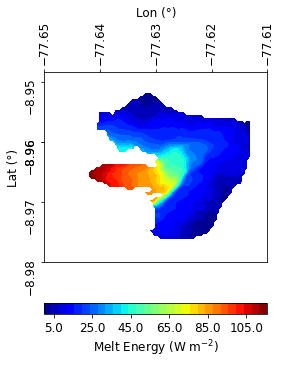

In [5]:
x,y = np.shape(mask_nc)
days_num = int(len(time_nc)/24)

ME_all   = ds['ME'].values
ME_all   = np.nanmean(ME_all,axis=0)

fig, ax = plt.subplots(figsize=(4,5))
im = ax.contourf(lon_nc,lat_nc,ME_all,30,vmin=0, vmax=115, cmap='jet')
ax.set_yticks(np.round(np.linspace(np.min(lat_nc), np.max(lat_nc), 5), decimals=2))
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(which='both', rotation=90)
ax.set_xticks(np.round(np.linspace(np.min(lon_nc), np.max(lon_nc), 5), decimals=2))
ax.yaxis.set_tick_params(which='both', rotation=90)
ax.set_ylabel('Lat (°)')
ax.set_xlabel('Lon (°)')
ax.xaxis.set_label_position('top')
lab_cbar = np.arange(5,110,20)
fig.colorbar(im, label = 'Melt Energy (W m$^{-2}$)', format='%1.1f',
             orientation="horizontal", ticks=lab_cbar)
font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
fig.savefig(dir_graphics+'/'+name_fig+'.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)
